In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
#data = pd.read_csv('spambase.data')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
data.shape

(4601, 58)

In [4]:
#spam email
len(data[data.iloc[:,57]==1])

1813

In [5]:
#regular email
len(data[data.iloc[:,57]==0])

2788

In [6]:
data.fillna(0)
x=data.iloc[:, 0:57]
y=data.iloc[:, 57]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Create Decision Tree classifer 
clf = DecisionTreeClassifier(max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9250814332247557


In [10]:
from sklearn.metrics import confusion_matrix

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)

[[507  24]
 [ 44 346]]


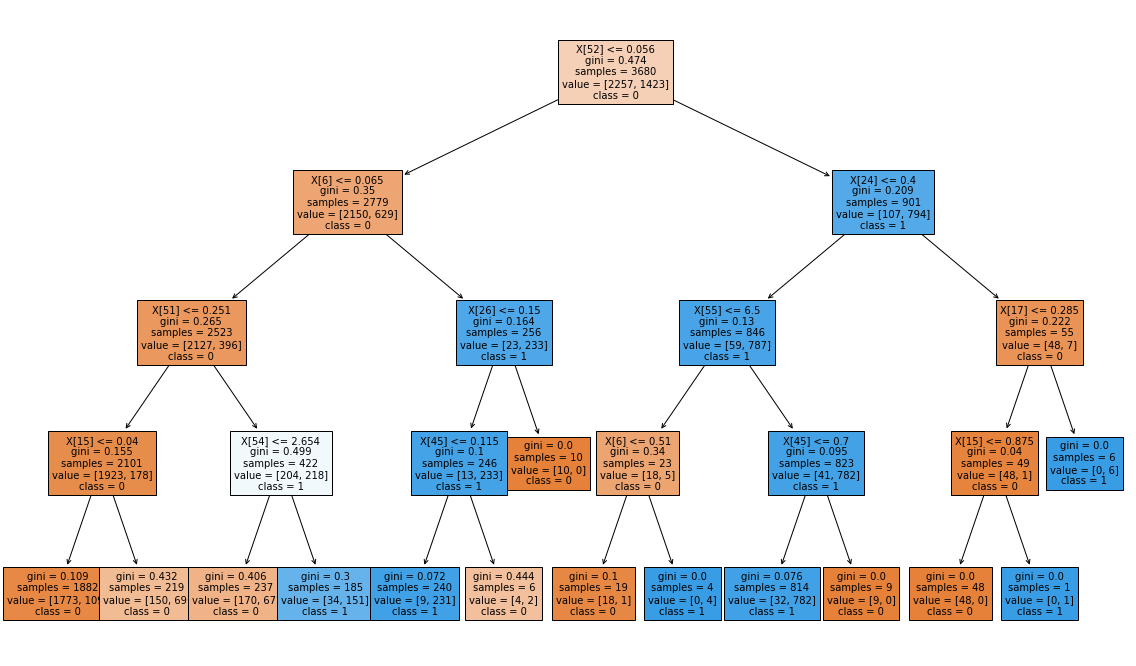

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

clf_test = tree.DecisionTreeClassifier(max_depth=4)
fig, ax = plt.subplots(figsize=(20, 12))
tree.plot_tree(clf_test.fit(x_train, y_train), class_names=['0','1'], filled=True, fontsize=10)
plt.show()

This is an imbalanced dataset. Hence, accuracy is not a good metric to evaluate the performance of the model. We use AUC (Area Under The Curve) as a performance measure. It is one of the most important evaluation metrics for checking any classification model's performance. ROC (Receiver Operat- ing Characteristics) curve measures classification accuracy at various thresholds settings. AUC measures the total area under the ROC curve. Higher the AUC, better the model is at distinguishing the two classes.

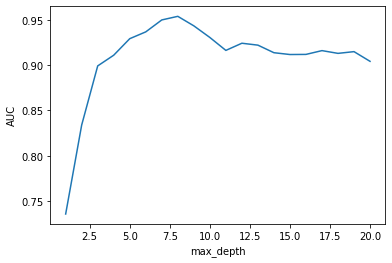

In [12]:
auc_values=[]
for i in range(1,21):
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(x_train,y_train)
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    auc_values.append(auc)
    
plt.figure
plt.plot(np.arange(1, 21), auc_values)
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()